In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 引入資料

In [2]:
df_train = pd.read_csv(r'C:\Users\owner\Study\Kaggle_House Prices\HousePricesData\train.csv') # 將資料變成dataframe
df_test  = pd.read_csv(r'C:\Users\owner\Study\Kaggle_House Prices\HousePricesData\test.csv')
df_train.head() # 印出資料查看資料內容

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 觀察資料

In [3]:
print(df_train.shape) # 查看trian的形狀，以方便後來訂定神經網路的輸入層
print(df_test.shape)  # 查看test形狀
print('*'*50)
print(df_train.dtypes) # 看一下訓練資料的各個欄位的型態

(1460, 81)
(1459, 80)
**************************************************
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


## 資料整理

In [4]:
# 先把不用的Id拿掉

df_train.drop("Id",inplace = True,axis=1) # inplace = True會直接把原本的data改掉，axis=1才會刪除 行
df_test.drop("Id",inplace = True,axis=1)  # inplace = True會直接把原本的data改掉，axis=1才會刪除 行
df_train.head(5) # .head()可以查看前幾筆資料，括號填入數字

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 【補充】 Seaborn 小小介紹
Seaborn是在Matplotlib上面的高階視覺化API，相較於Matplotlib，Seaborn繪圖更快速，要以比喻的方式說明Seaborn和Matplotlib的關係，就像是Keras和tensorflow關係一樣，所以以Seaborn的方式繪畫會更快、更方面，就像Keras在建神經網路一樣非常方便。但這邊特別出來是因為，在分析資料時常常會使用Seaborn畫圖更為快速～

## 視覺化相關係數
若資料彼此為數字關係才會進行計算，若資料型態是物件(object)的話，df =dataframe.corr()會無法計算，所以只出現型態是float的行！

所以原本80行的資料才會只剩下37行，關係數矩陣形狀變成37*37

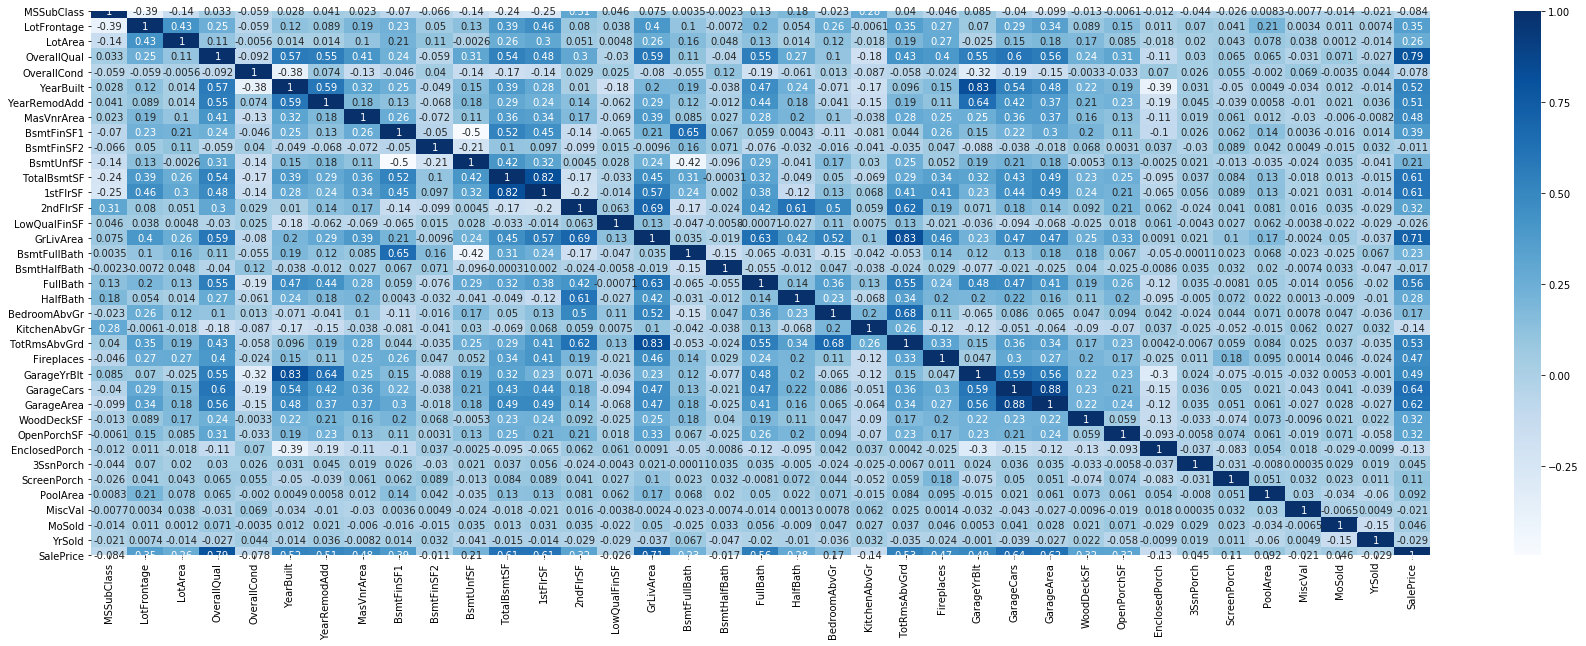

In [5]:
trian_corr =df_train.corr() # 計算相關係數
plt.subplots(figsize=(30, 10))  # 設置長寬尺寸大小
sns.heatmap(trian_corr, annot=True, vmax=1, cmap="Blues")
# 1.丟入的資料 2.是否輸出熱力圖數值大小 3.最大值顯示 4.要什麼顏色

In [6]:
# 抓出相關係數高的

high_corr = trian_corr.index[abs(trian_corr["SalePrice"])>0.6]
# abs是取絕對值的意思
# abs(trian_corr["SalePrice"])>0.6 這句的意思是與SalePrice有關的係數>0.6的判別式，它會輸出True(大於0.6)或是False
# abs(trian_corr["SalePrice"])>0.6 會丟回一堆True和False，放在原本的trian_corr.index[]就會把是大於0.6的傳回去
print(high_corr) 

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')


## 找出object(資料編碼)

In [7]:
trian_corr =df_train.corr() # 計算相關係數
float_data = trian_corr.index # 是 float或int的的傢伙
all_col = df_train.columns # 全部的col
object_data = []
for i in range(len(all_col)): # 查找全部的all_col，len(all_col)是長度(要全部找過一遍)
    if all_col[i] not in float_data: # 如果在float_data裡面沒有，表示它是object幫的
        object_data.append(all_col[i]) # 不是就加上去
print(len(object_data))
print(object_data)

43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Label Encoding
因為我們只要查看object與售價的相關度，所以把同一行不同種的分開標記就好！

In [8]:
from sklearn.preprocessing import LabelEncoder
#df_train[pd.isnull(df_train)]  = 'NaN'
for i in object_data: # 將轉換是object的傢伙轉換，從object_data陣列一個一個抓出來改造
        df_train[i] = LabelEncoder().fit_transform(df_train[i].factorize()[0]) 
        # pd.factorize()[0]會給nans(缺失值)一個-1的值，若沒寫這個，會造成等號兩邊不等的情況
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,20,0,80.0,9600,0,0,0,0,0,1,...,0,0,0,0,0,5,2007,0,0,181500
2,60,0,68.0,11250,0,0,1,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,70,0,60.0,9550,0,0,1,0,0,2,...,0,0,0,0,0,2,2006,0,1,140000
4,60,0,84.0,14260,0,0,1,0,0,1,...,0,0,0,0,0,12,2008,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,62.0,7917,0,0,0,0,0,0,...,0,0,0,0,0,8,2007,0,0,175000
1456,20,0,85.0,13175,0,0,0,0,0,0,...,0,0,1,0,0,2,2010,0,0,210000
1457,70,0,66.0,9042,0,0,0,0,0,0,...,0,0,3,1,2500,5,2010,0,0,266500
1458,20,0,68.0,9717,0,0,0,0,0,0,...,0,0,0,0,0,4,2010,0,0,142125


## 計算所有資料的相關係數矩陣
關係數矩陣形狀變成80*80

(80, 80)


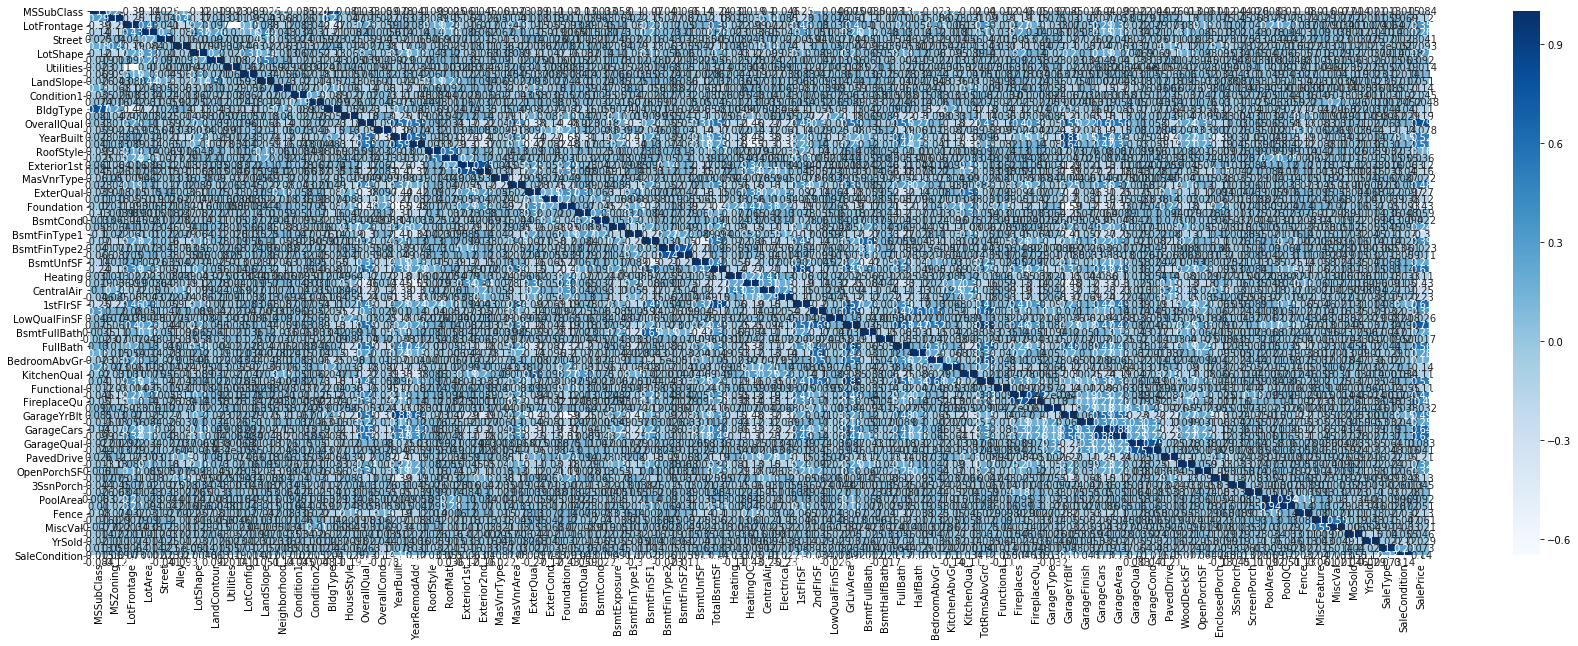

In [9]:
trian_corr =df_train.corr() #計算相關係數
print(trian_corr.shape) #查看形狀
plt.subplots(figsize=(30, 10))  # 設置長寬尺寸大小
sns.heatmap(trian_corr, annot=True, vmax=1, cmap="Blues")
# 1.丟入的資料 2.是否輸出熱力圖數值大小 3.最大值顯示 4.要什麼顏色

In [10]:
# 一樣找出相關度高點的：

high_corr = trian_corr.index[abs(trian_corr["SalePrice"])>0.6]
# abs是取絕對值的意思
# abs(trian_corr["SalePrice"])>0.6 這句的意思是與SalePrice有關的係數>0.6的判別式，它會輸出True(大於0.6)或是False
# abs(trian_corr["SalePrice"])>0.6 會丟回一堆True和False，放在原本的trian_corr.index[]就會把是大於0.6的傳回去
print(high_corr) 

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')


## 先拔掉相關細數小於0.6的資料

In [11]:
for i in df_train.columns: # 查找原本資料中所有columns
    if i not in high_corr: # 如果沒有相關係數大於0.6的話
        df_train = df_train.drop(i,axis=1) # 就把它拔掉
df_train.head()

# 所以剩下的都是和SalePrice相關係數大於0.6的行們

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,7,856,856,1710,2,548,208500
1,6,1262,1262,1262,2,460,181500
2,7,920,920,1786,2,608,223500
3,7,756,961,1717,3,642,140000
4,8,1145,1145,2198,3,836,250000


## 先取出SalePrice(答案)
我們要先把SalePrice拿出來當作Y，才能用預測值跟真的Y(SalePrice)比較。

In [12]:
train_targets = df_train["SalePrice"].values #把SalePrice這行數值整個拉出來
train_data = df_train.drop(columns=["SalePrice"]) #刪除SalePrice這行
print(train_targets)
print("*"*50)
train_data

[208500 181500 223500 ... 266500 142125 147500]
**************************************************


,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,7,856,856,1710,2,548
1,6,1262,1262,1262,2,460
2,7,920,920,1786,2,608
3,7,756,961,1717,3,642
4,8,1145,1145,2198,3,836
...,...,...,...,...,...,...
1455,6,953,953,1647,2,460
1456,6,1542,2073,2073,2,500
1457,7,1152,1188,2340,1,252
1458,5,1078,1078,1078,1,240


## 切分出驗證集

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_validation,Y_trian,Y_validation = train_test_split(train_data, train_targets, test_size=0.2, random_state=0)
# X_train,X_test, y_train, y_test = model_selection.train_test_split(train_data,train_target,test_size=0.2, random_state=0)
# train_test_split(1.資料的 x那些種類 2.y的部分 3.X_test的部分要佔全部資料的多少(我們這裡是驗證集唷) 4.指定一個隨機種子，0的話就是隨機囉)
# 就是一種隨機切分資料的功能
# 隨機種子相同的話，在另一個框框在跑一次一樣的code還是會出現相同的隨機數

print(X_train.shape)
print(Y_trian.shape)
print('*'*50)
print(X_validation.shape)
print(Y_validation.shape)
print('*'*50)
X_train_dataset = X_train.values # 取出數值，轉換回 array
X_validation_dataset = X_validation.values
X_train_dataset

(1168, 6)
(1168,)
**************************************************
(292, 6)
(292,)
**************************************************


array([[   9, 1822, 1828, 1828,    3,  774],
       [   5,  894,  894,  894,    1,  308],
       [   5,  876,  964,  964,    2,  432],
       ...,
       [   6,    0, 1318, 1902,    2,  539],
       [   7, 1374, 1557, 1557,    2,  420],
       [   7, 1195, 1195, 1839,    2,  486]], dtype=int64)

## 將原本的訓練資料和驗證資料都先標準化！

In [14]:
from sklearn import preprocessing #引入所需函式庫
normalize = preprocessing.StandardScaler() #取一個短的名字
# 標準化處理
X_trian_normal_data = normalize.fit_transform(X_train_dataset) #將訓練資料標準化
X_validation_normal_data = normalize.fit_transform(X_validation_dataset) #將驗證資料標準化

print(X_trian_normal_data)
print('*'*50)
print(X_validation_normal_data)

[[ 2.13150648  1.86572881  1.78757018  0.60188649  1.68363344  1.43474327]
 [-0.79485211 -0.38726187 -0.71540986 -1.21671763 -1.05711061 -0.79116606]
 [-0.79485211 -0.43096212 -0.52782035 -1.08041967  0.31326141 -0.19886401]
 ...
 [-0.06326246 -2.55770764  0.4208466   0.7459729   0.31326141  0.31223535]
 [ 0.66832719  0.77807813  1.06133079  0.0742187   0.31326141 -0.25618356]
 [ 0.66832719  0.34350342  0.09122504  0.62330474  0.31326141  0.05907398]]
**************************************************
[[-0.10448035  1.80908987  3.08966184  1.77891255  0.30770478  0.05915902]
 [-0.10448035 -0.50234569 -0.48512908  0.13380716 -0.92311434 -0.99987664]
 [-0.79784997 -0.68477796 -0.43691417 -0.52458613 -0.92311434 -0.51376191]
 ...
 [-0.10448035 -0.67537423  1.13581016  1.79822542 -0.92311434 -1.10404408]
 [-1.49121958 -1.22831325 -1.05911606 -1.39366529 -2.15393345 -2.04155105]
 [-0.79784997 -1.0214313  -1.35070145 -0.68611196 -0.92311434 -0.79154175]]


## 建構神經網路

## Keras建立神經網路

In [15]:
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras.layers import BatchNormalization,Dropout,Dense
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [16]:
#建立model

def model():
    model = Sequential()
    model.add(layers.Dense(1024,kernel_initializer = 'random_normal',
             activation = 'relu',
             input_shape = (X_trian_normal_data.shape[1],)))
    model.add(Dropout(0.3)) # 括號中的數字是指要丟棄多少神經元(0~1之間，是丟棄的比例)
    
    model.add(layers.Dense(1024, kernel_initializer = 'random_normal', 
                        activation = 'relu'))
    model.add(Dropout(0.3))
    
    model.add(layers.Dense(512, kernel_initializer = 'random_normal', 
                        activation = 'relu'))
    model.add(Dropout(0.3))
    
    model.add(layers.Dense(256, kernel_initializer = 'random_normal', 
                           activation = 'relu'))
    model.add(Dropout(0.3))
    
    model.add(layers.Dense(128, kernel_initializer = 'random_normal', 
                           activation = 'relu'))
    model.add(Dropout(0.3))
    
    model.add(layers.Dense(32, kernel_initializer = 'random_normal', 
                           activation = 'relu'))
    model.add(Dropout(0.3))
    
    model.add(layers.Dense(16, kernel_initializer = 'random_normal', 
                           activation = 'relu'))
    model.add(Dropout(0.3))
    
    model.add(layers.Dense(1, kernel_initializer = 'random_normal',
                          activation = 'linear'))
    
    adam = optimizers.Adam(lr=0.001)   #lr學習率
    model.compile(optimizer = adam, loss = 'mae')   #設定要的優化器以及loss函數
    
    return model     

In [17]:
# 神經網路的架構
# model.summary()

## 設定回調函數開始訓練！
回調函數Callbacks(ModelCheckpoint)，透過回調函數可以在我們訓練的過程中紀錄最好的model！

In [18]:
call = ModelCheckpoint('house_predict.h5',   # 1.保存的名稱
                     monitor = 'val_loss',   # 2.要監視的值
                     verbose = 0,   # 3.訊息展示的樣子
                     save_best_only = True,    # 4.5.設置為True的時候，當監視的數值變低會立即保存，也就是保存最好的
                     save_weights_only = True, # (所以也有人會讓epochs很大很大去抓最好的，但神經網路或是資料沒有多做什麼調整其實不會差到太多)
                     mode = 'auto',   # 6.auto模式下在比對你的監視值他會自己判斷是不是變好還是變差，要不要儲存
                     period = 1)   # 7. CheckPoint間的epcoh數

model = model()    
history = model.fit(X_trian_normal_data, Y_trian,
                    validation_data = [X_validation_normal_data, Y_validation],   # 3.validation_data就是加入驗證集去讓超參數跑得更好
                    callbacks = [call],   # 4.callbacks看是否要使用，然後設定是怎樣子
                    epochs = 600,    # 5.epochs完整的資料要疊代幾次
                    batch_size = 512,  # 6.每次的批次大小是多少
                    verbose = 1)   # 少7.verbose:0是不輸出進度條；1是輸出進度條





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




Train on 1168 samples, validate on 292 samples
Epoch 1/600





1168/1168 [==============================] - 20s 17ms/step - loss: 180808.8979 - val_loss: 181370.3750
Epoch 2/600
1168/1168 [==============================] - 1s 874us/step - loss: 180808.8739 - val_loss: 181370.3281
Epoch 3/600
1168/1168 [==============================] - 1s 795us/step - loss: 180808.7297 - val_loss: 181369.5938
Epoch 4/600
1168/1168 [==============================] - 1s 917us/step - loss: 180807.5845 - val_loss: 181366.8438
Epoch 5/600
1168/1168 [==============================] - 1s 700us/step - loss: 180803.4615 - val_loss: 181356.7969
Epoch 6/600
1168/1168 [==============================] - 1s 754us/step - loss: 180788.7427 - val_loss: 181323.8906
Epoch 7/600
1168/1168 [==============================] - 1s 773us/step - loss: 180740.6171 - val_loss: 181227.1719
Epoch 8/600
1168/116

1168/1168 [==============================] - 1s 817us/step - loss: 43815.6526 - val_loss: 35704.4297
Epoch 47/600
1168/1168 [==============================] - 1s 638us/step - loss: 44666.6215 - val_loss: 29711.3359
Epoch 48/600
1168/1168 [==============================] - 1s 646us/step - loss: 41836.9289 - val_loss: 27920.0312
Epoch 49/600
1168/1168 [==============================] - 1s 624us/step - loss: 43995.1706 - val_loss: 31588.6230
Epoch 50/600
1168/1168 [==============================] - 1s 504us/step - loss: 44070.4751 - val_loss: 34849.6289
Epoch 51/600
1168/1168 [==============================] - 0s 421us/step - loss: 45859.7144 - val_loss: 29947.9316
Epoch 52/600
1168/1168 [==============================] - 0s 403us/step - loss: 44758.5972 - val_loss: 27269.5215
Epoch 53/600
1168/1168 [==============================] - 1s 653us/step - loss: 42832.8282 - val_loss: 29173.0078
Epoch 54/600
1168/1168 [==============================] - 1s 719us/step - loss: 44957.3385 - val_loss

Epoch 118/600
1168/1168 [==============================] - 0s 318us/step - loss: 41695.4062 - val_loss: 27268.7168
Epoch 119/600
1168/1168 [==============================] - 0s 301us/step - loss: 41096.6147 - val_loss: 26735.4473
Epoch 120/600
1168/1168 [==============================] - 0s 270us/step - loss: 42493.3370 - val_loss: 25176.8359
Epoch 121/600
1168/1168 [==============================] - 0s 283us/step - loss: 43059.2099 - val_loss: 26155.0938
Epoch 122/600
1168/1168 [==============================] - 0s 298us/step - loss: 41847.3120 - val_loss: 29834.8359
Epoch 123/600
1168/1168 [==============================] - 0s 265us/step - loss: 41375.9889 - val_loss: 27714.2812
Epoch 124/600
1168/1168 [==============================] - 0s 295us/step - loss: 42559.2713 - val_loss: 25272.8262
Epoch 125/600
1168/1168 [==============================] - 0s 338us/step - loss: 41507.5588 - val_loss: 25520.0938
Epoch 126/600
1168/1168 [==============================] - 0s 296us/step - loss:

1168/1168 [==============================] - 0s 320us/step - loss: 40956.1980 - val_loss: 26506.5820
Epoch 190/600
1168/1168 [==============================] - 0s 329us/step - loss: 43321.4002 - val_loss: 28371.4004
Epoch 191/600
1168/1168 [==============================] - 0s 326us/step - loss: 41340.5825 - val_loss: 24652.0703
Epoch 192/600
1168/1168 [==============================] - 0s 285us/step - loss: 42968.5969 - val_loss: 24058.7324
Epoch 193/600
1168/1168 [==============================] - 0s 299us/step - loss: 39285.3204 - val_loss: 28834.4316
Epoch 194/600
1168/1168 [==============================] - 0s 312us/step - loss: 42103.9006 - val_loss: 26544.9219
Epoch 195/600
1168/1168 [==============================] - 0s 299us/step - loss: 39902.9778 - val_loss: 24869.5469
Epoch 196/600
1168/1168 [==============================] - 0s 270us/step - loss: 40583.1916 - val_loss: 25238.8047
Epoch 197/600
1168/1168 [==============================] - 0s 296us/step - loss: 40022.6702 - 

1168/1168 [==============================] - 0s 350us/step - loss: 42620.9827 - val_loss: 23421.1719
Epoch 261/600
1168/1168 [==============================] - 0s 349us/step - loss: 40965.6401 - val_loss: 29379.5645
Epoch 262/600
1168/1168 [==============================] - 1s 446us/step - loss: 40130.4770 - val_loss: 25799.5762
Epoch 263/600
1168/1168 [==============================] - 1s 496us/step - loss: 42240.9560 - val_loss: 23816.1738
Epoch 264/600
1168/1168 [==============================] - 1s 444us/step - loss: 41647.0765 - val_loss: 28275.9023
Epoch 265/600
1168/1168 [==============================] - 0s 364us/step - loss: 41303.7533 - val_loss: 23976.6602
Epoch 266/600
1168/1168 [==============================] - 0s 399us/step - loss: 43253.5972 - val_loss: 23777.0312
Epoch 267/600
1168/1168 [==============================] - 0s 350us/step - loss: 42212.5923 - val_loss: 26002.7129
Epoch 268/600
1168/1168 [==============================] - 0s 275us/step - loss: 41726.4067 - 

1168/1168 [==============================] - 0s 395us/step - loss: 42845.2652 - val_loss: 28201.9824
Epoch 332/600
1168/1168 [==============================] - 0s 416us/step - loss: 41444.4590 - val_loss: 23913.7754
Epoch 333/600
1168/1168 [==============================] - 0s 347us/step - loss: 39773.7054 - val_loss: 23868.0488
Epoch 334/600
1168/1168 [==============================] - 0s 288us/step - loss: 42994.3793 - val_loss: 24033.9473
Epoch 335/600
1168/1168 [==============================] - 0s 290us/step - loss: 41901.3610 - val_loss: 25446.9688
Epoch 336/600
1168/1168 [==============================] - 0s 278us/step - loss: 41174.3880 - val_loss: 25542.5000
Epoch 337/600
1168/1168 [==============================] - 0s 284us/step - loss: 40625.1413 - val_loss: 25766.0039
Epoch 338/600
1168/1168 [==============================] - 0s 267us/step - loss: 41102.0028 - val_loss: 28343.2363
Epoch 339/600
1168/1168 [==============================] - 0s 277us/step - loss: 40817.9993 - 

1168/1168 [==============================] - 0s 366us/step - loss: 42698.8382 - val_loss: 22992.5488
Epoch 403/600
1168/1168 [==============================] - 1s 438us/step - loss: 42437.5110 - val_loss: 29408.9766
Epoch 404/600
1168/1168 [==============================] - 0s 412us/step - loss: 41972.0046 - val_loss: 30322.8281
Epoch 405/600
1168/1168 [==============================] - 0s 409us/step - loss: 42394.5948 - val_loss: 23044.0410
Epoch 406/600
1168/1168 [==============================] - 0s 334us/step - loss: 39743.5591 - val_loss: 22592.1934
Epoch 407/600
1168/1168 [==============================] - 0s 314us/step - loss: 41993.6881 - val_loss: 25716.0449
Epoch 408/600
1168/1168 [==============================] - 0s 331us/step - loss: 40836.0428 - val_loss: 27634.1504
Epoch 409/600
1168/1168 [==============================] - 0s 328us/step - loss: 39183.3424 - val_loss: 24053.8730
Epoch 410/600
1168/1168 [==============================] - 0s 279us/step - loss: 41399.5918 - 

1168/1168 [==============================] - 0s 276us/step - loss: 41853.8862 - val_loss: 26865.4160
Epoch 474/600
1168/1168 [==============================] - 0s 256us/step - loss: 40101.7639 - val_loss: 22886.7344
Epoch 475/600
1168/1168 [==============================] - 0s 278us/step - loss: 41653.5967 - val_loss: 24681.5078
Epoch 476/600
1168/1168 [==============================] - 0s 328us/step - loss: 41436.2616 - val_loss: 26852.1465
Epoch 477/600
1168/1168 [==============================] - 0s 266us/step - loss: 41624.3560 - val_loss: 24527.1816
Epoch 478/600
1168/1168 [==============================] - 0s 270us/step - loss: 41534.5702 - val_loss: 23535.2090
Epoch 479/600
1168/1168 [==============================] - 0s 281us/step - loss: 40561.0275 - val_loss: 24160.3418
Epoch 480/600
1168/1168 [==============================] - 0s 275us/step - loss: 41042.8118 - val_loss: 23558.6172
Epoch 481/600
1168/1168 [==============================] - 0s 281us/step - loss: 43107.7440 - 

1168/1168 [==============================] - 0s 308us/step - loss: 41065.5465 - val_loss: 27519.6836
Epoch 545/600
1168/1168 [==============================] - 0s 256us/step - loss: 41413.9457 - val_loss: 28879.4785
Epoch 546/600
1168/1168 [==============================] - 0s 254us/step - loss: 43131.4725 - val_loss: 22718.5234
Epoch 547/600
1168/1168 [==============================] - 0s 268us/step - loss: 42224.9317 - val_loss: 22481.1738
Epoch 548/600
1168/1168 [==============================] - 0s 261us/step - loss: 41738.5302 - val_loss: 26996.0586
Epoch 549/600
1168/1168 [==============================] - 0s 268us/step - loss: 41643.8791 - val_loss: 26845.5586
Epoch 550/600
1168/1168 [==============================] - 0s 279us/step - loss: 41302.4523 - val_loss: 22934.2656
Epoch 551/600
1168/1168 [==============================] - 0s 270us/step - loss: 39868.0130 - val_loss: 24924.6191
Epoch 552/600
1168/1168 [==============================] - 0s 268us/step - loss: 41148.0730 - 

## 查看loss

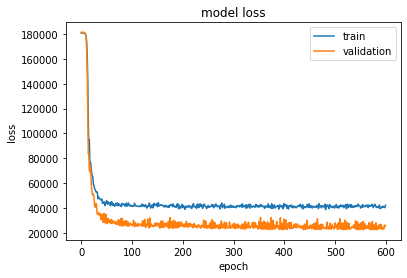

In [19]:
#history 會記錄訓練的狀況，會將 model.fit回傳的東西記錄下來，以下是常用的示範
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')   # loc='upper right' 表示图例将添加在图中的右上角.
plt.show()

## 先處理一下測試集
因為我們在做model訓練時，輸入只有相對係數高的那些行，所以如果這時候做測試集時若是輸入不一樣的shape會造成bug的出現，因此有必要也對測試集進行相同的手法！

In [20]:
for i in df_test.columns: #查找原本資料中所有columns
    if i not in high_corr: 
        #如果沒有在訓練時相關係數大於0.6的話就拔掉，因為真正影響房價的不是小於0.6的
        df_test = df_test.drop(i,axis=1) 
        #i是跑過test裡面的columns所有人，axis=1是指定要丟掉"行"
print(df_test) #看一下刪掉相關係數小的人樣子
print("*"*100)
X_test_dataset = df_test.values #只要數值就好不要dataframe形式

from sklearn import preprocessing
normalize = preprocessing.StandardScaler() 
# 標準化處理
X_test_normal_data = normalize.fit_transform(X_test_dataset)
print(X_test_normal_data) #看一下標準化的結果

      OverallQual  TotalBsmtSF  1stFlrSF  GrLivArea  GarageCars  GarageArea
0               5        882.0       896        896         1.0       730.0
1               6       1329.0      1329       1329         1.0       312.0
2               5        928.0       928       1629         2.0       482.0
3               6        926.0       926       1604         2.0       470.0
4               8       1280.0      1280       1280         2.0       506.0
...           ...          ...       ...        ...         ...         ...
1454            4        546.0       546       1092         0.0         0.0
1455            4        546.0       546       1092         1.0       286.0
1456            5       1224.0      1224       1224         2.0       576.0
1457            5        912.0       970        970         0.0         0.0
1458            7        996.0       996       2000         3.0       650.0

[1459 rows x 6 columns]
***************************************************************

## 載入儲存的model估測看看測試集房價

In [21]:
model.load_weights('house_predict.h5') #召喚之前儲存的model
pred = model.predict(X_test_normal_data) #括號內填入要預測的資料
print(pred)

[[132526.84]
 [160324.14]
 [150021.  ]
 ...
 [151740.75]
 [110842.53]
 [241637.88]]


## 將預測資料打包成csv檔

In [22]:
with open('house_predict.csv', 'w') as f: #開啟一個檔案，house_predict.csv是名字；w是寫入
    f.write('id,SalePrice\n') #寫入最上方的列，並用\n往下一列
    for i in range(len(pred)): #len(pred)看整個test有多長，然後用for去跑全部
        f.write(str(i + 1461) + ',' + str(float(pred[i])) + '\n')
        #寫入，這邊特別注意「+1461」，因為它給的sample_submission是從1461開始
        #中間加上逗號是因為前面有介紹過csv檔是以逗號為間隔的檔案
        #str(float(pred[i]):先把它變成浮點數，再用str()把它變回字串
        #後面的'\n'是要換下一列的意思
        #注意到中間全部是用「+號」隔開，這是字串的基本招式唷

### 還可以怎麼更好？
* 異常值沒有處理，異常值可以這樣說，例如我們只看坪數和房價間的關係，那麼通常幾乎是正比，但在這筆訓練資料中其實有些異常值出現，坪數上升房價反而下降到谷底。
* 資料轉換後不夠平滑，有看到其他人再做將字串上label後還會做log曲線，讓資料更加平滑。
* 演算法替換，如ElasticNet、嶺迴歸和隨機森林等等。